### Use custom dataloader ###

In [1]:
from MoD44BLoader import MoD44BLoader

In [2]:
resolution = 100
loader = MoD44BLoader("../project/data/h17v07/", "Percent_Tree_Cover", resolution)
data = loader.get_time_series()
print(data.shape)

(20, 100, 100)


In [3]:
import numpy as np
forecasted_data = np.load("../project/data/h17v07/3f.npy")
forecast_steps = forecasted_data.shape[0]

In [4]:
years = loader.get_time_years()
forecast_years = [years[-1]+i for i in range(1, forecast_steps+1)]

Forest cover visualization functions loaded!
Use these functions to create heatmaps and time series plots.

Creating change maps between years...


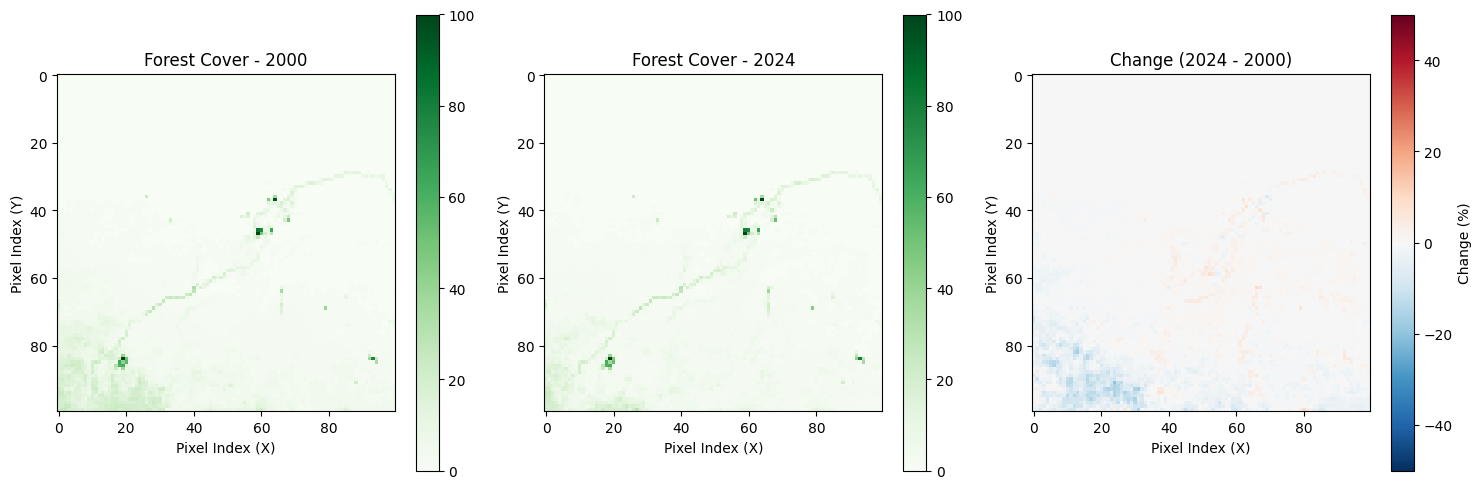

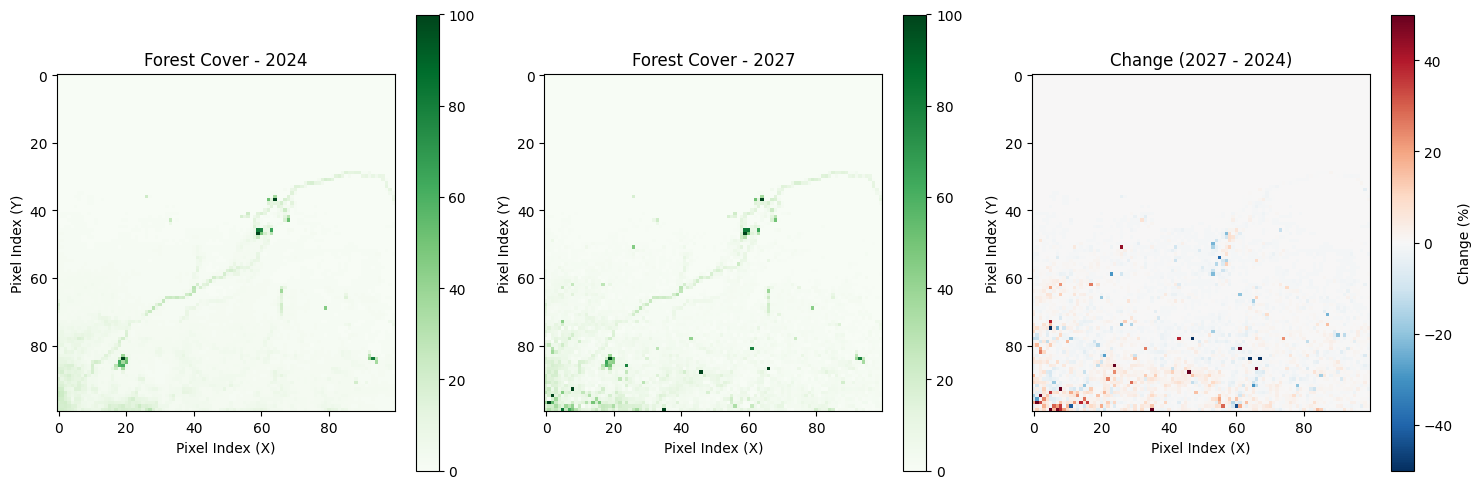


Creating forecast visualization...


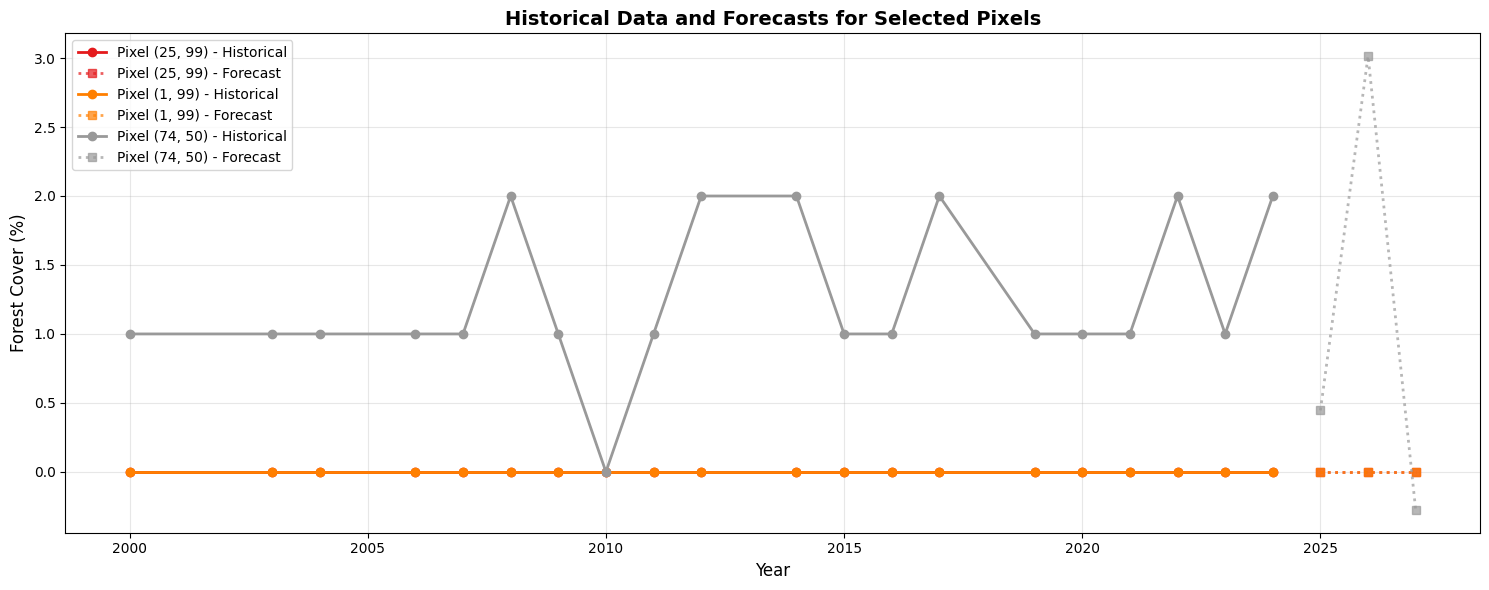


5. Summary statistics...
Forest Cover Statistics by Year:
2000: Mean=2.3%, Std=5.0%, Min=0.0%, Max=120.0%
2003: Mean=2.0%, Std=4.6%, Min=0.0%, Max=119.0%
2004: Mean=2.3%, Std=5.1%, Min=0.0%, Max=120.0%
2006: Mean=2.2%, Std=4.9%, Min=0.0%, Max=119.0%
2007: Mean=2.0%, Std=4.7%, Min=0.0%, Max=119.0%
2008: Mean=2.4%, Std=5.0%, Min=0.0%, Max=119.0%
2009: Mean=2.6%, Std=5.5%, Min=0.0%, Max=120.0%
2010: Mean=1.9%, Std=4.7%, Min=0.0%, Max=120.0%
2011: Mean=1.7%, Std=4.7%, Min=0.0%, Max=121.0%
2012: Mean=2.2%, Std=4.9%, Min=0.0%, Max=121.0%
2014: Mean=2.3%, Std=5.0%, Min=0.0%, Max=119.0%
2015: Mean=2.1%, Std=4.9%, Min=0.0%, Max=119.0%
2016: Mean=1.5%, Std=4.1%, Min=0.0%, Max=119.0%
2017: Mean=1.9%, Std=4.5%, Min=0.0%, Max=120.0%
2019: Mean=2.2%, Std=5.1%, Min=0.0%, Max=120.0%
2020: Mean=1.8%, Std=4.5%, Min=0.0%, Max=120.0%
2021: Mean=1.6%, Std=4.3%, Min=0.0%, Max=120.0%
2022: Mean=1.8%, Std=4.1%, Min=0.0%, Max=120.0%
2023: Mean=1.9%, Std=4.7%, Min=0.0%, Max=119.0%
2024: Mean=1.8%, Std=4.3%, Mi

In [5]:
from forest_cover_visualizations import create_forest_cover_heatmap, create_time_series_comparison, create_change_map, create_forecast_visualization
import matplotlib.pyplot as plt

#CREATE CHANGE MAPS
print("\nCreating change maps between years...")

# Change from first to last year
fig5, axes5 = create_change_map(data[0], data[-1], years[0], years[-1])
plt.show()

# Change from last year to last forecasted year
fig6, axes6 = create_change_map(data[-1], forecasted_data[-1], years[-1], years[-1]+forecast_steps)
plt.show()

# CREATE FORECAST VISUALIZATION (if you have forecast data)
print("\nCreating forecast visualization...")

# Create forecast visualization
pixel_coords = [(25, 99), (1, 99), (74, 50)]
fig7, axes7 = create_forecast_visualization(data, forecasted_data, years, forecast_years, pixel_coords)
plt.show()

#CREATE SUMMARY STATISTICS
print("\n5. Summary statistics...")

print("Forest Cover Statistics by Year:")
for i, year in enumerate(years):
    data_year = data[i]
    valid_data = data_year[~np.isnan(data_year)]
    if len(valid_data) > 0:
        print(f"{year}: Mean={np.mean(valid_data):.1f}%, Std={np.std(valid_data):.1f}%, "
              f"Min={np.min(valid_data):.1f}%, Max={np.max(valid_data):.1f}%")
